In [4]:
import csv
#在csv檔案裡面寫入資料並儲存的方法

# 原有的csv檔案
cpbl_pitchings_csv = 'pitchings_2022.csv'

# 建立一個新的csv文件，加入紀錄年份2022後儲存
new_csv = 'pitchings_2022_PR.csv'

with open(cpbl_pitchings_csv, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.DictReader(csvfile)
        
    # 取得欄位名稱，並加上Year欄位
    fieldnames= csv_reader.fieldnames + ['ER_PR']
        
    # 開啟新的csv文件，寫入欄位名稱
    with open(new_csv, 'w', encoding='utf-8', newline='') as output_file:
        csv_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        csv_writer.writeheader()
            
    # 將原本的資料寫入新的csv，同時在每一筆資料的最後面加上 'Year': '2022'
        for row in csv_reader:
            test = sum(csv_reader['ER'])
            print(test)
            #csv_writer.writerow(row)

print(f'修改後的資料已寫入 {new_csv}')

TypeError: 'DictReader' object is not subscriptable

In [2]:
import csv
#在csv檔案裡面寫入資料並儲存的方法

# 原有的csv檔案
cpbl_pitchings_csv = 'pitchings_2022.csv'

# 建立一個新的csv文件，加入紀錄年份2022後儲存
new_csv = 'pitchings_2022_PR.csv'

with open(cpbl_pitchings_csv, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    print(csv_reader)
        
    # 取得欄位名稱，並加上Year欄位
    #fieldnames= csv_reader.fieldnames + ['ER_PR']

In [5]:
import csv

# 原有的 csv 檔案
cpbl_pitchings_csv = 'pitchings_2022.csv'

# 建立一個新的 csv 文件，加入紀錄年份 2022 後儲存
new_csv = 'pitchings_2022_PR.csv'

# 讀取原始 csv 檔案
with open(cpbl_pitchings_csv, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.DictReader(csvfile)

    # 取得欄位名稱，並加上 'ER_PR' 欄位
    fieldnames = csv_reader.fieldnames + ['ER_PR']

    # 計算所有球員 ER 的平均值
    total_er = sum(float(row['ER']) for row in csv_reader)
    num_players = csv_reader.line_num - 1  # 減去標題行

    # 設定迭代器回到檔案的開頭
    csvfile.seek(0)
    next(csv_reader)  # 跳過標題行

    # 開啟新的 csv 文件，寫入欄位名稱
    with open(new_csv, 'w', encoding='utf-8', newline='') as output_file:
        csv_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        csv_writer.writeheader()

        # 將原本的資料寫入新的 csv，同時在每一筆資料的最後面加上 'Year': '2022' 和 'ER_PR' 資料
        for row in csv_reader:
            er_pr = float(row['ER']) / (total_er / num_players) if total_er != 0 else 0
            row['ER_PR'] = er_pr
            csv_writer.writerow(row)

print(f'修改後的資料已寫入 {new_csv}')


修改後的資料已寫入 pitchings_2022_PR.csv


In [7]:
import csv

# 原有的 csv 檔案
cpbl_pitchings_csv = 'pitchings_2022.csv'

# 建立一個新的 csv 文件，加入紀錄年份 2022 後儲存
new_csv = 'pitchings_2022_PR.csv'

# 讀取原始 csv 檔案
with open(cpbl_pitchings_csv, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.DictReader(csvfile)

    # 取得欄位名稱，並加上 'ER_PR' 欄位
    fieldnames = csv_reader.fieldnames + ['ER_PR']

    # 計算所有球員 ER 的總和
    total_er = sum(float(row['ER']) for row in csv_reader)

    # 設定迭代器回到檔案的開頭
    csvfile.seek(0)
    next(csv_reader)  # 跳過標題行

    # 開啟新的 csv 文件，寫入欄位名稱
    with open(new_csv, 'w', encoding='utf-8', newline='') as output_file:
        csv_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        csv_writer.writeheader()

        # 將原本的資料寫入新的 csv，同時在每一筆資料的最後面加上 'Year': '2022' 和 'ER_PR' 資料
        for row in csv_reader:
            er_pr = round((total_er - float(row['ER'])) / total_er * 100, 2) if total_er != 0 else 0
            row['ER_PR'] = er_pr
            csv_writer.writerow(row)

print(f'修改後的資料已寫入 {new_csv}')



修改後的資料已寫入 pitchings_2022_PR.csv


In [4]:
import csv

# 原有的csv檔案
cpbl_pitchings_csv = 'pitchings_2022.csv'

# 建立一個新的csv文件，加入新的欄位
new_csv = 'pitchings_2022_updated.csv'

# 計算三振率 (K9) 與防禦率 (ERA) 並加入新的欄位
with open(cpbl_pitchings_csv, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.DictReader(csvfile)

    # 取得欄位名稱，並加上新的欄位名稱
    fieldnames = csv_reader.fieldnames + ['K9', 'ERA', 'K9_PR', 'ERA_PR']

    # 開啟新的csv文件，寫入欄位名稱
    with open(new_csv, 'w', encoding='utf-8', newline='') as output_file:
        csv_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        csv_writer.writeheader()

        # 計算三振率、防禦率，並加入新的欄位
        for row in csv_reader:
            so = float(row['SO'])
            er = float(row['ER'])
            ip = float(row['IP'])

            # 檢查 ip 是否為零，避免除以零的錯誤
            if ip != 0:
                k9 = (so / ip) * 9
                era = (er * 9) / ip
            else:
                k9 = 0
                era = 0

            # 新增三振率 (K9) 與防禦率 (ERA) 欄位
            row['K9'] = round(k9, 2)
            row['ERA'] = round(era, 2)

            # 計算三振率、防禦率的PR值
            k9_pr = round((k9 - float(row['K9'])) / k9 * 100, 2) if k9 != 0 else 0
            era_pr = round((era - float(row['ERA'])) / era * 100, 2) if era != 0 else 0

            # 新增三振率 (K9) 與防禦率 (ERA) 的PR值欄位
            row['K9_PR'] = k9_pr
            row['ERA_PR'] = era_pr

            # 寫入新的資料列
            csv_writer.writerow(row)

print(f'修改後的資料已寫入 {new_csv}')



修改後的資料已寫入 pitchings_2022_updated.csv


In [5]:
#新增三振率跟ERA到csv

import csv

def calculate_k9(so, ip):
    try:
        k9 = (so / ip) * 9
        return round(k9, 2)
    except ZeroDivisionError:
        return 0.0

def calculate_era(er, ip):
    try:
        era = (er * 9) / ip
        return round(era, 2)
    except ZeroDivisionError:
        return 0.0

# 原有的csv檔案
cpbl_pitchings_csv = 'pitchings_2022.csv'

# 建立一個新的csv文件，加入紀錄年份2022後儲存
new_csv = 'pitchings_2022_updated.csv'

with open(cpbl_pitchings_csv, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.DictReader(csvfile)

    # 取得欄位名稱，並加上新的欄位名稱
    fieldnames = csv_reader.fieldnames + ['K9', 'ERA']

    # 開啟新的csv文件，寫入欄位名稱
    with open(new_csv, 'w', encoding='utf-8', newline='') as output_file:
        csv_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        csv_writer.writeheader()

        # 將原本的資料寫入新的csv，同時計算新的數值，並寫入新的欄位
        for row in csv_reader:
            so = float(row['SO'])
            ip = float(row['IP'])
            er = float(row['ER'])

            k9 = calculate_k9(so, ip)
            era = calculate_era(er, ip)

            row['K9'] = k9
            row['ERA'] = era

            csv_writer.writerow(row)

print(f'修改後的資料已寫入 {new_csv}')


修改後的資料已寫入 pitchings_2022_updated.csv


In [8]:
import csv

def calculate_k9(so, ip):
    try:
        k9 = (so / ip) * 9
        return round(k9, 2)
    except ZeroDivisionError:
        return 0.0

def calculate_era(er, ip):
    try:
        era = (er * 9) / ip
        return round(era, 2)
    except ZeroDivisionError:
        return 0.0

# 原有的csv檔案
cpbl_pitchings_csv = 'pitchings_2022.csv'

# 初始化變數以保存平均值
total_k9 = 0.0
total_era = 0.0
count = 0

with open(cpbl_pitchings_csv, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.DictReader(csvfile)

    for row in csv_reader:
        so = float(row['SO'])
        ip = float(row['IP'])
        er = float(row['ER'])

        k9 = calculate_k9(so, ip)
        era = calculate_era(er, ip)

        total_k9 += k9
        total_era += era
        count += 1

# 計算平均值
average_k9 =round((total_k9 / count if count > 0 else 0.0),2)
average_era =round((total_era / count if count > 0 else 0.0),2)

print(f'平均 K9: {average_k9}')
print(f'平均 ERA: {average_era}')


平均 K9: 6.03
平均 ERA: 6.93


C:\Users\User\AppData\Local\Temp\ipykernel_10796\4018456807.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, ci=None)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29699 (\N{CJK UNIFIED IDEOGRAPH-7403}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21729 (\N{CJK UNIFIED IDEOGRAPH-54E1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-50

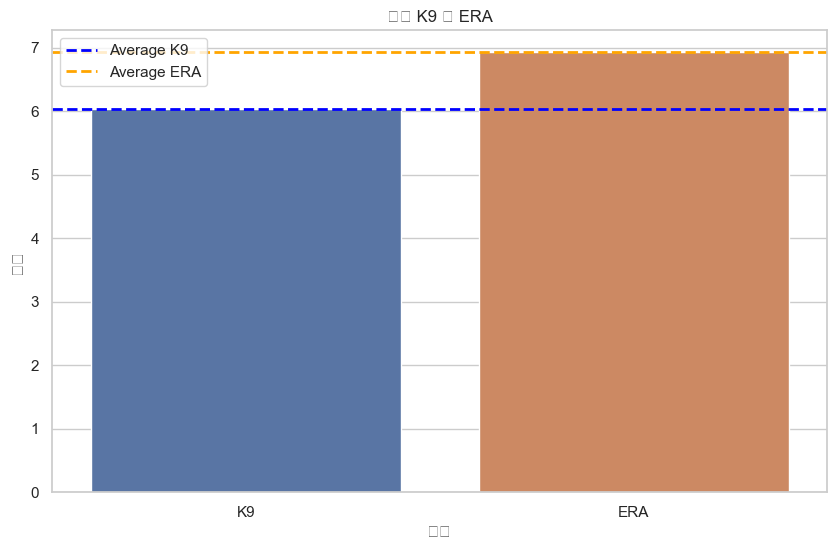

In [1]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_k9(so, ip):
    try:
        k9 = (so / ip) * 9
        return round(k9, 2)
    except ZeroDivisionError:
        return 0.0

def calculate_era(er, ip):
    try:
        era = (er * 9) / ip
        return round(era, 2)
    except ZeroDivisionError:
        return 0.0

# 原有的csv檔案
cpbl_pitchings_csv = 'pitchings_2022.csv'

# 初始化變數以保存平均值
total_k9 = 0.0
total_era = 0.0
count = 0

k9_values = []
era_values = []

with open(cpbl_pitchings_csv, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.DictReader(csvfile)

    for row in csv_reader:
        so = float(row['SO'])
        ip = float(row['IP'])
        er = float(row['ER'])

        k9 = calculate_k9(so, ip)
        era = calculate_era(er, ip)

        total_k9 += k9
        total_era += era
        count += 1

        k9_values.append(k9)
        era_values.append(era)

# 計算平均值
average_k9 = total_k9 / count if count > 0 else 0.0
average_era = total_era / count if count > 0 else 0.0

# 創建一個 DataFrame
import pandas as pd
data = pd.DataFrame({'K9': k9_values, 'ERA': era_values})

# 設定 Seaborn 样式
sns.set(style="whitegrid")

# 繪製長條圖
plt.figure(figsize=(10, 6))
sns.barplot(data=data, ci=None)

# 加入平均線
plt.axhline(average_k9, color='blue', linestyle='dashed', linewidth=2, label='Average K9')
plt.axhline(average_era, color='orange', linestyle='dashed', linewidth=2, label='Average ERA')

plt.xlabel('球員')
plt.ylabel('數值')
plt.title('球員 K9 與 ERA')
plt.legend()

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8036\4018456807.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, ci=None)
c:\Rachel\GitHub\11209Python_school\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29699 (\N{CJK UNIFIED IDEOGRAPH-7403}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Rachel\GitHub\11209Python_school\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21729 (\N{CJK UNIFIED IDEOGRAPH-54E1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Rachel\GitHub\11209Python_school\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Rachel\GitHub\11209Python_school\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) 

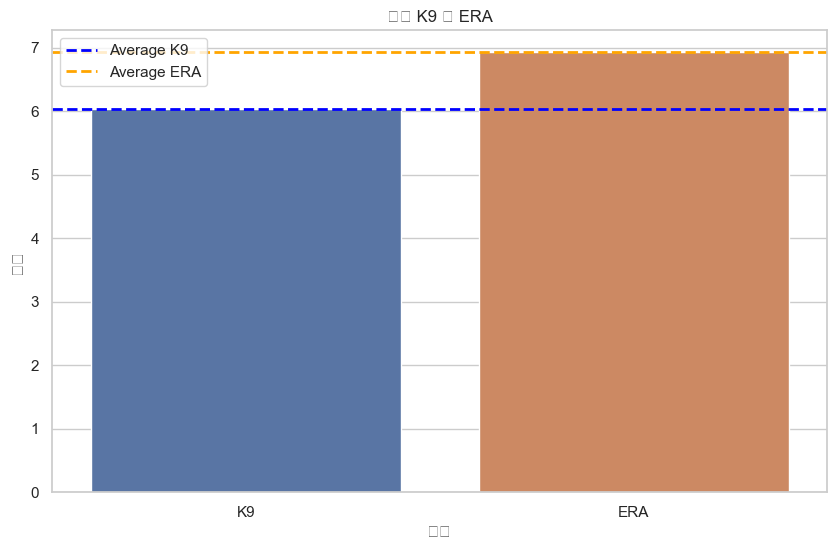

In [1]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_k9(so, ip):
    try:
        k9 = (so / ip) * 9
        return round(k9, 2)
    except ZeroDivisionError:
        return 0.0

def calculate_era(er, ip):
    try:
        era = (er * 9) / ip
        return round(era, 2)
    except ZeroDivisionError:
        return 0.0

# 原有的csv檔案
cpbl_pitchings_csv = 'pitchings_2022.csv'

# 初始化變數以保存平均值
total_k9 = 0.0
total_era = 0.0
count = 0

k9_values = []
era_values = []

with open(cpbl_pitchings_csv, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.DictReader(csvfile)

    for row in csv_reader:
        so = float(row['SO'])
        ip = float(row['IP'])
        er = float(row['ER'])

        k9 = calculate_k9(so, ip)
        era = calculate_era(er, ip)

        total_k9 += k9
        total_era += era
        count += 1

        k9_values.append(k9)
        era_values.append(era)

# 計算平均值
average_k9 = total_k9 / count if count > 0 else 0.0
average_era = total_era / count if count > 0 else 0.0

# 創建一個 DataFrame
import pandas as pd
data = pd.DataFrame({'K9': k9_values, 'ERA': era_values})

# 設定 Seaborn 样式
sns.set(style="whitegrid")

# 繪製長條圖
plt.figure(figsize=(10, 6))
sns.barplot(data=data, ci=None)

# 加入平均線
plt.axhline(average_k9, color='blue', linestyle='dashed', linewidth=2, label='Average K9')
plt.axhline(average_era, color='orange', linestyle='dashed', linewidth=2, label='Average ERA')

plt.xlabel('球員')
plt.ylabel('數值')
plt.title('球員 K9 與 ERA')
plt.legend()

plt.show()


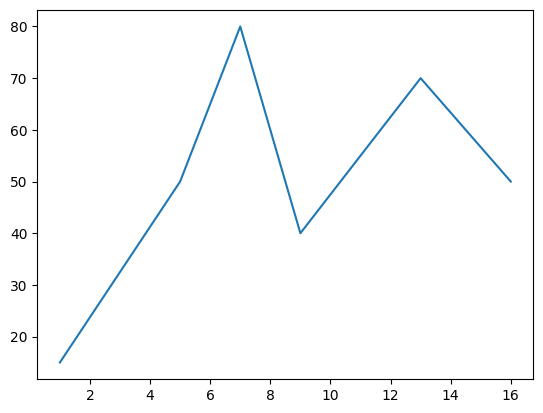

In [1]:
import matplotlib.pyplot as plt

listx = [1,5,7,9,13,16]
listy = [15,50,80,40,70,50]
plt.plot(listx, listy)
plt.show()

In [3]:
import pandas as pd
import matplotlib
from matplotlib.font_manager import fontManager
# 加入中文字型設定：翰字鑄造-台北黑體
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

df = pd.DataFrame([[250,320,300,312,280],
							[280,300,280,290,310],
							[220,280,250,305,250]],
							index=['北部','中部','南部'],
							columns=[2015,2016,2017,2018,2019])

g1 = df.plot(kind='bar', title='長條圖', figsize=[10,5])
g2 = df.plot(kind='barh', title='橫條圖', figsize=[10,5])
g3 = df.plot(kind='bar', stacked=True, title='堆疊圖', figsize=[10,5])

FileNotFoundError: [Errno 2] No such file or directory: 'TaipeiSansTCBeta-Regular.ttf'

In [2]:
import tkinter as tk

class SearchApp:
    def __init__(self, master):
        self.master = master
        master.title("搜尋欄位示範")

        # 創建搜尋欄位
        self.search_entry = tk.Entry(master, width=30)
        self.search_entry.pack(pady=10)

        # 創建搜尋按鈕
        self.search_button = tk.Button(master, text="搜尋", command=self.perform_search)
        self.search_button.pack()

        # 創建顯示搜尋結果的標籤
        self.result_label = tk.Label(master, text="")
        self.result_label.pack(pady=10)

    def perform_search(self):
        # 獲取搜尋欄位的內容
        search_term = self.search_entry.get()

        # 做一些搜尋的操作，這裡只是將搜尋內容顯示在標籤上
        self.result_label.config(text=f"搜尋結果：{search_term}")

if __name__ == "__main__":
    root = tk.Tk()
    app = SearchApp(root)
    root.mainloop()


2023-11-27 21:23:40.743 Python[1881:38337] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


: 

In [1]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/rachelyeh/Documents/Python應用實戰/課程資料/徐國堂/GitHub/11209Python_school/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'